# Trajectory MDM on BCI data

In this notebook, we show how to reproduce the results of the paper _AVERAGING TRAJECTORIES ON THE MANIFOLD OF COVARIANCE MATRICES_ on real BCI data. We will show how to use the _PT-MDM_ and _DTW-MDM_ code that is provided in this repository and compare the results to the FgMDM [3] on one dataset.

In [1]:
import numpy as np
from pymanopt.manifolds import SymmetricPositiveDefinite

from source.trajectory_fgmdm_for_EEG import DTW_MDM, PT_MDM

import moabb
from moabb.datasets import Zhou2016
from moabb.paradigms import FilterBankMotorImagery
from pyriemann.classification import FgMDM
from pyriemann.estimation import Covariances

from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

We start by loading the dataset that we want to work with, in this example we chose the dataset `Zhou2016` [1] from the MOABB library [2] because of its small size. We start by some simple preprocess steps such as applying a standard band-pass filter with range $[7; 35]$ Hz.

In [2]:
dataset = Zhou2016()
filters = [[7,35]]
paradigm = FilterBankMotorImagery(filters = filters)
f_ech = 250 #Hz

Choosing from all possible events


### DTW-MDM

We choose the hyperparameters for our DTW-MDM classifier as described in the paper. For this dataset we choose a number of iterations `nb_it = 10`, a threshold for the convergence `eps = 10e-5`, the size of the sub-windows of the EEG to be $1$ sec so `size_window = 1*f_ech` and the number of points on the mean trajectory `size_mean_traj = 6`. 

In [3]:
nb_it = 10
eps = 1e-5
size_window = int(1*f_ech)
size_mean_traj = 6

For each subject, we will train a classifer on 5 different splits of the data in order to have the mean accuracy over 5 folds. 

In [4]:
accuracy_list_DTW_MDM = np.array([])
for i in dataset.subject_list:
    print("=========================================")
    print("Loading the data...")
    print("Training for subject " + str(i))
    X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[i])
    (nb_traj, nb_sensors, length_EEG) = X.shape
    # Data loaded
    
    manifold = SymmetricPositiveDefinite(n=nb_sensors)
    
    # Creating the 5 splits 
    cv = KFold(n_splits=5, shuffle=True, random_state = 42)
    DTW_MDM_ = DTW_MDM(manifold, nb_it, eps, size_mean_traj, size_window,cov_estimator='lwf')
    print("Starting cross validation")
    
    # Computing the scores on the 5 splits
    scores = cross_val_score(DTW_MDM_, X, labels, cv=cv, n_jobs=-1, verbose=1)

    print("The mean score for subject  " + str(i) + " is " + str(np.mean(scores)))
    print("The var score for subject  " + str(i) + " is " + str(np.var(scores)))
    #print("It took " + str(time_train) + " sec to train")
    accuracy_list_DTW_MDM = np.concatenate((accuracy_list_DTW_MDM,scores))

Loading the data...
Training for subject 1
Reading 0 ... 305029  =      0.000 ...  1220.116 secs...
Reading 0 ... 430479  =      0.000 ...  1721.916 secs...
Reading 0 ... 252599  =      0.000 ...  1010.396 secs...
Reading 0 ... 296649  =      0.000 ...  1186.596 secs...
Reading 0 ... 233249  =      0.000 ...   932.996 secs...
Reading 0 ... 226219  =      0.000 ...   904.876 secs...
Starting cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 80%|████████  | 8/10 [02:33<00:38, 19.15s/it]

 80%|████████  | 8/10 [02:36<00:39, 19.58s/it]

100%|██████████| 10/10 [02:52<00:00, 17.29s/it]

100%|██████████| 10/10 [03:00<00:00, 18.03s/it]
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min
100%|██████████| 10/10 [03:03<00:00, 18.38s/it]

100%|██████████| 10/10 [03:15<00:00, 19.53s/it]

100%|██████████| 10/10 [03:20<00:00, 20.03s/it]
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


The mean score for subject  1 is 0.883829365079365
The var score for subject  1 is 0.0022696060484378947
Loading the data...
Training for subject 2
Reading 0 ... 227539  =      0.000 ...   910.156 secs...
Reading 0 ... 216079  =      0.000 ...   864.316 secs...
Reading 0 ... 213939  =      0.000 ...   855.756 secs...
Reading 0 ... 175269  =      0.000 ...   701.076 secs...
Reading 0 ... 213209  =      0.000 ...   852.836 secs...
Reading 0 ... 217659  =      0.000 ...   870.636 secs...
Starting cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 80%|████████  | 8/10 [02:35<00:38, 19.43s/it]

 90%|█████████ | 9/10 [02:50<00:18, 18.95s/it]

100%|██████████| 10/10 [02:59<00:00, 17.95s/it][A
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min

100%|██████████| 10/10 [03:07<00:00, 18.78s/it][A

100%|██████████| 10/10 [03:16<00:00, 19.66s/it]

100%|██████████| 10/10 [03:29<00:00, 20.95s/it]
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


The mean score for subject  2 is 0.7620689655172412
The var score for subject  2 is 0.0019500594530321026
Loading the data...
Training for subject 3
Reading 0 ... 219849  =      0.000 ...   879.396 secs...
Reading 0 ... 216709  =      0.000 ...   866.836 secs...
Reading 0 ... 226609  =      0.000 ...   906.436 secs...
Reading 0 ... 266929  =      0.000 ...  1067.716 secs...
Reading 0 ... 227989  =      0.000 ...   911.956 secs...
Reading 0 ... 222459  =      0.000 ...   889.836 secs...
Starting cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
 70%|███████   | 7/10 [02:57<01:15, 25.30s/it]

100%|██████████| 10/10 [03:33<00:00, 21.31s/it]
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.3min
100%|██████████| 10/10 [03:39<00:00, 21.98s/it]

100%|██████████| 10/10 [03:54<00:00, 23.43s/it]

100%|██████████| 10/10 [04:04<00:00, 24.49s/it]

100%|██████████| 10/10 [04:06<00:00, 24.65s/it]
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.1min finished


The mean score for subject  3 is 0.9466666666666667
The var score for subject  3 is 0.0008222222222222225
Loading the data...
Training for subject 4
Reading 0 ... 181339  =      0.000 ...   725.356 secs...
Reading 0 ... 217139  =      0.000 ...   868.556 secs...
Reading 0 ... 215399  =      0.000 ...   861.596 secs...
Reading 0 ... 212209  =      0.000 ...   848.836 secs...
Reading 0 ... 209799  =      0.000 ...   839.196 secs...
Reading 0 ... 217109  =      0.000 ...   868.436 secs...
Starting cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
  0%|          | 0/10 [00:00<?, ?it/s]

 80%|████████  | 8/10 [02:56<00:44, 22.12s/it]

 80%|████████  | 8/10 [03:22<00:50, 25.33s/it]

100%|██████████| 10/10 [03:26<00:00, 20.65s/it]

100%|██████████| 10/10 [03:38<00:00, 21.83s/it]
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.5min
100%|██████████| 10/10 [03:41<00:00, 22.15s/it]

100%|██████████| 10/10 [03:48<00:00, 22.80s/it]

100%|██████████| 10/10 [03:50<00:00, 23.01s/it]

100%|██████████| 10/10 [03:50<00:00, 23.10s/it]
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


The mean score for subject  4 is 0.9379310344827585
The var score for subject  4 is 0.0009036860879904886


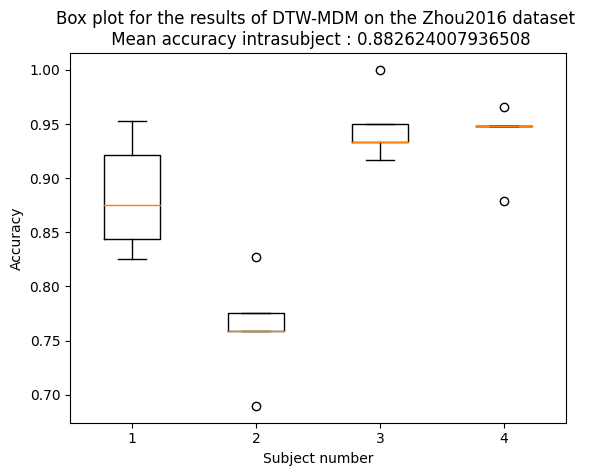

In [5]:
plt.figure()
plt.boxplot(accuracy_list_DTW_MDM.reshape((4,5)).T)
plt.xlabel("Subject number")
plt.ylabel("Accuracy")
plt.title("Box plot for the results of DTW-MDM on the Zhou2016 dataset \n Mean accuracy intrasubject : " + str(np.mean(accuracy_list_DTW_MDM)))
plt.show()

### PT-MDM

We can now do the same thing with the other method that we present in the paper : _PT-MDM_.

In [6]:
accuracy_list_PT_MDM = np.array([])
for i in dataset.subject_list:
    print("=========================================")
    print("Loading the data...")
    print("Training for subject " + str(i))
    X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[i])
    (nb_traj, nb_sensors, length_EEG) = X.shape
    # Data loaded
    
    manifold = SymmetricPositiveDefinite(n=nb_sensors)
    
    # Creating the 5 splits 
    cv = KFold(n_splits=5, shuffle=True, random_state = 42)
    PT_MDM_ = PT_MDM(manifold, size_window,cov_estimator='lwf')
    print("Starting cross validation")
    
    # Computing the scores on the 5 splits
    scores = cross_val_score(PT_MDM_, X, labels, cv=cv, n_jobs=-1)

    print("The mean score for subject  " + str(i) + " is " + str(np.mean(scores)))
    print("The var score for subject  " + str(i) + " is " + str(np.var(scores)))
    #print("It took " + str(time_train) + " sec to train")
    accuracy_list_PT_MDM = np.concatenate((accuracy_list_PT_MDM,scores))

Loading the data...
Training for subject 1
Reading 0 ... 305029  =      0.000 ...  1220.116 secs...
Reading 0 ... 430479  =      0.000 ...  1721.916 secs...
Reading 0 ... 252599  =      0.000 ...  1010.396 secs...
Reading 0 ... 296649  =      0.000 ...  1186.596 secs...
Reading 0 ... 233249  =      0.000 ...   932.996 secs...
Reading 0 ... 226219  =      0.000 ...   904.876 secs...
Starting cross validation
The mean score for subject  1 is 0.8838789682539682
The var score for subject  1 is 0.0017600367693373646
Loading the data...
Training for subject 2
Reading 0 ... 227539  =      0.000 ...   910.156 secs...
Reading 0 ... 216079  =      0.000 ...   864.316 secs...
Reading 0 ... 213939  =      0.000 ...   855.756 secs...
Reading 0 ... 175269  =      0.000 ...   701.076 secs...
Reading 0 ... 213209  =      0.000 ...   852.836 secs...
Reading 0 ... 217659  =      0.000 ...   870.636 secs...
Starting cross validation
The mean score for subject  2 is 0.7827586206896552
The var score for su

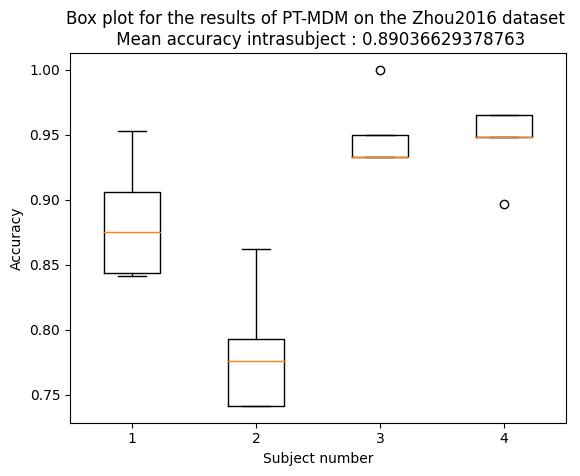

In [7]:
plt.figure()
plt.boxplot(accuracy_list_PT_MDM.reshape((4,5)).T)
plt.xlabel("Subject number")
plt.ylabel("Accuracy")
plt.title("Box plot for the results of PT-MDM on the Zhou2016 dataset \n Mean accuracy intrasubject : " + str(np.mean(accuracy_list_PT_MDM)))
plt.show()

### FgMDM

We can now compare the results with the state of the art FgMDM [3]. 

In [8]:
accuracy_list_FgMDM = np.array([])
for i in dataset.subject_list:
    print("=========================================")
    print("Loading the data...")
    print("Training for subject " + str(i))
    X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[i])
    print("Data loaded !")
    
    cov_data_train = Covariances(estimator = 'lwf').transform(X)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    mdm = FgMDM()
    scores = cross_val_score(mdm, cov_data_train, labels, cv=cv, n_jobs=-1)
    print("The mean score for subject  " + str(i) + " is " + str(np.mean(scores)))
    accuracy_list_FgMDM = np.concatenate((accuracy_list_FgMDM,scores))

Loading the data...
Training for subject 1
Reading 0 ... 305029  =      0.000 ...  1220.116 secs...
Reading 0 ... 430479  =      0.000 ...  1721.916 secs...
Reading 0 ... 252599  =      0.000 ...  1010.396 secs...
Reading 0 ... 296649  =      0.000 ...  1186.596 secs...
Reading 0 ... 233249  =      0.000 ...   932.996 secs...
Reading 0 ... 226219  =      0.000 ...   904.876 secs...
Data loaded !
The mean score for subject  1 is 0.8150297619047618
Loading the data...
Training for subject 2
Reading 0 ... 227539  =      0.000 ...   910.156 secs...
Reading 0 ... 216079  =      0.000 ...   864.316 secs...
Reading 0 ... 213939  =      0.000 ...   855.756 secs...
Reading 0 ... 175269  =      0.000 ...   701.076 secs...
Reading 0 ... 213209  =      0.000 ...   852.836 secs...
Reading 0 ... 217659  =      0.000 ...   870.636 secs...
Data loaded !
The mean score for subject  2 is 0.7620689655172413
Loading the data...
Training for subject 3
Reading 0 ... 219849  =      0.000 ...   879.396 secs..

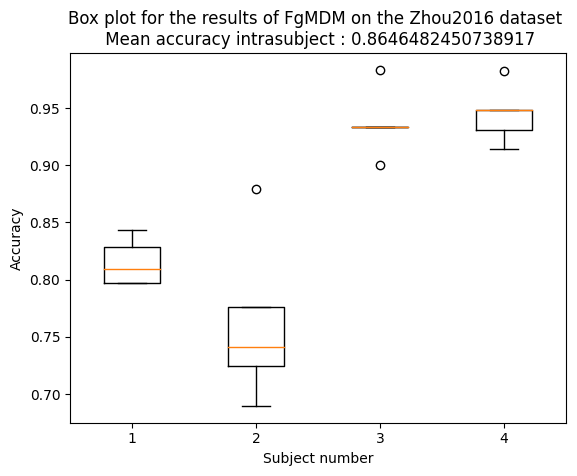

In [9]:
plt.figure()
plt.boxplot(accuracy_list_FgMDM.reshape((4,5)).T)
plt.xlabel("Subject number")
plt.ylabel("Accuracy")
plt.title("Box plot for the results of FgMDM on the Zhou2016 dataset \n Mean accuracy intrasubject : " + str(np.mean(accuracy_list_FgMDM)))
plt.show()

### References

[1] B. Zhou, X. Wu, Z. Lv, L. Zhang, and X. Guo, “A fully automated trial selection method for optimization of motor imagery based brain-computer interface,” _PLOS ONE_, vol. 11, no. 9, pp. 1–20, 09 2016.

[2] V. Jayaram and A. Barachant, “Moabb: trustworthy algorithm benchmarking for bcis,” _J Neural Eng_, vol. 15, no. 6, pp. 066011, 2018.

[3] A. Barachant, S. Bonnet, M. Congedo, and C. Jutten, “Riemannian geometry applied to BCI classification,” in _LVA/ICA 2010_. Sept. 2010, vol. 6365, p. 629, Springer.